In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../lite_data/dec15_extracted_domains.csv", header=0)
data.head()

,Unnamed: 0,author,domain,count
0,0,NaN,1950.today,1
1,1,NaN,4lakhdenahoga.com,2
2,2,NaN,aajtak.in,32
3,3,NaN,abc.net.au,1
4,4,NaN,abplive.com,20


In [3]:
data2 = pd.read_csv("../lite_data/aap_dec15_extracted_domains.csv", header=0)
data2.head()

,Unnamed: 0,author,domain,count
0,0,NaN,1.si,1
1,1,NaN,54.xn--h2brj9c,1
2,2,NaN,5dariyanews.com,1
3,3,NaN,aajtak.in,8
4,4,NaN,aamaadmiparty.org,1


In [4]:
data = pd.concat([data, data2])

In [5]:
print(len(data))
print(len(data.dropna(subset=['author'])))

69042
68463


In [6]:
data = data.dropna(subset=['author'])

In [7]:
data.head()

,Unnamed: 0,author,domain,count
411,411,01Bidar,drivespark.com,1
412,412,01Bidar,indiatoday.in,1
413,413,01Bidar,livehindustan.com,1
414,414,01Bidar,prajavani.net,4
415,415,01Bidar,shrts.in,1


In [8]:
data.sample(5)

,Unnamed: 0,author,domain,count
61265,61265,vibhamathur10,indianexpress.com,1
31130,31130,Sunnydubey1994,shorturl.at,1
15475,15475,KSRathoreINC,pscp.tv,17
53534,53534,purneshmodi,youthparliamentofindia.co.in,1
24959,24959,RaiswalRajesh,thecitizen.in,1


In [9]:
#map author and party handle
import glob
from collections import Counter, defaultdict

datafiles = glob.glob("/home/phadke/ONR/ONR/big_data/Twitter/*.csv")
author2party = defaultdict()

for d in datafiles:
    splitfilename = d.replace(".csv", "").split("_")
    party = splitfilename[len(splitfilename)-1]
    author = splitfilename[len(splitfilename)-2]
    author2party[author] = party
    

In [10]:
author2party

defaultdict(None,
            {'s': 'BJP',
             'shailesh30cvru': 'INC',
             'buta': 'AAP',
             'jayrajmori': 'INC',
             'rakeshrjnair': 'BJP',
             'AzadmanojBjp': 'BJP',
             'DipakRelon': 'BJP',
             'sanjaypaswanbjp': 'BJP',
             'AAPHrKarnal': 'AAP',
             'ASKollapur': 'INC',
             'rajender88800': 'INC',
             'TuffailQadir': 'INC',
             'SagarikaRaoT': 'INC',
             'deeppant2': 'AAP',
             'SinghViveknsui': 'INC',
             'harnamsingh5968': 'INC',
             'SunitaDuggal7': 'BJP',
             'Naveen1177': 'INC',
             'aap': 'AAP',
             'phaisring96': 'BJP',
             'RitaBJoshi': 'BJP',
             'sidhagrwlbjp': 'BJP',
             'DrSanjaySinhMP': 'BJP',
             'koprabhuannur': 'AIADMK',
             'ArpitThakurBJP': 'BJP',
             'KotaCongress': 'INC',
             'S': 'INC',
             'GauravJ8928': 'INC',
         

In [11]:
len(author2party.keys())

11389

In [12]:
data['party'] = data['author'].apply(lambda x: author2party[x])

In [13]:
data.sample(5)

,Unnamed: 0,author,domain,count,party
4603,4603,aapkaamarjit,timesnownews.com,2,AAP
35816,35816,akankshakaurbjp,timesnownews.com,2,BJP
19482,19482,MithileshPate19,indiatimes.com,3,BJP
58259,58259,shriraj,f24.my,1,INC
7090,7090,BjpRajora,pscp.tv,9,BJP


In [14]:
print(Counter(data[['author','party']].drop_duplicates()['party'].tolist()))

Counter({'BJP': 2528, 'INC': 2217, 'AAP': 340})


### domain labels

In [15]:
domlabs = pd.read_csv("../lite_data/Website_List.csv", header=0)
domlabs.head()

,UniqueID,Website_Name,Political_Leaning,Website_URL,Language,MobileSite,PrintMedia,TVMedia,OnlineMedia,FacebookReach,TwitterReach,InstagramReach,AlexaGlobalRank,AlexaIndiaRank,Parent_Company,Website_Registrar,Registered_On,Expires_On,TrafficContributingSubDomains
0,1.0,Aaj Tak,RIGHT_TO_RIGHTCENTRE,aajtak.intoday.in,Hindi,m.aajtak.in,N,Y,Y,26.2M,9.8M,3.7M,607.7K,98.2K,Living Media Group (TV Today Network Limited),MPS Infotecnics Limited,16/02/2005,16/02/2029,"{'m.aajtak.in': '93.83%', 'OTHER': '6.17%'}"
1,2.0,Dainik Jagran,RIGHT_TO_RIGHTCENTRE,jagran.com,Hindi,m.jagran.com,Y,N,Y,14.8M,1.1M,58.5K,1.7K,132,Jagran Prakashan Limited,"Network Solutions, LLC",17/01/1997,18/01/2030,"{'jagran.com': '70.51%', 'epaper.jagran.com': ..."
2,3.0,RVCJ News,NaN,rvcj.com,English,N,N,N,Y,14.5M,193.0K,2.5M,26.9K,3.8K,RVCJ Digital Media Private Limited,"NameCheap, Inc.",20/04/2007,20/04/2022,"{'rvcj.com': '99.04%', 'OTHER': '0.97%'}"
3,4.0,Dainik Bhaskar,RIGHT_TO_RIGHTCENTRE,bhaskar.com,Hindi,N,Y,N,Y,14.3M,1.0M,988.2K,1.3K,107,D B Corp Limited,PDR Ltd. d/b/a PublicDomainRegistry.com,17/04/1998,16/04/2029,"{'bhaskar.com': '72.22%', 'epaper.bhaskar.com'..."
4,5.0,Zee News,RIGHT_TO_RIGHTCENTRE,zeenews.india.com,English,N,N,Y,Y,11.4M,3.2M,1.8M,74.9K,7.6K,Essel Group,"GoDaddy.com, LLC",13/08/1997,30/05/2027,"{'cdn.zeenews.com': '53.01%', 'my.zeenews.com'..."


In [16]:
print(Counter(domlabs['Political_Leaning'].tolist()))

Counter({'LEFT_TO_LEFTCENTRE': 39, 'RIGHT_TO_RIGHTCENTRE': 37, 'CENTRIST_AND_LEASTBIASED': 27, nan: 23})


In [17]:
import ast
for idx, row in domlabs.iterrows():
    print(type(ast.literal_eval(row['TrafficContributingSubDomains'])))
    break

<class 'dict'>


In [18]:
domlabs = domlabs.dropna(subset=['Political_Leaning'])
dom2label = defaultdict()

for idx, row in domlabs.iterrows():
    leaning = row['Political_Leaning']
    main_url = row['Website_URL']
    dom2label[main_url] = leaning
    traffic = ast.literal_eval(row['TrafficContributingSubDomains'])
    if traffic:
        for k in traffic.keys():
            if k!= 'OTHER':
                dom2label[k] = leaning

In [19]:
dom2label

defaultdict(None,
            {'aajtak.intoday.in': 'RIGHT_TO_RIGHTCENTRE',
             'm.aajtak.in': 'RIGHT_TO_RIGHTCENTRE',
             'jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'epaper.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'english.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'classifieds.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'mapi.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'm.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'naiduniaepaper.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'epaperapi.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'images.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'events.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'webmail.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'originakam-epaper.jagran.com': 'RIGHT_TO_RIGHTCENTRE',
             'bhaskar.com': 'RIGHT_TO_RIGHTCENTRE',
             'epaper.bhaskar.com': 'RIGHT_TO_RIGHTCENTRE',
             'money.bhaskar.com': 'RIGHT_TO_RIGHTC

In [20]:
print(len(dom2label.keys()))

432


### keep news only

In [20]:
news_domains = pd.read_csv("../lite_data/domaintitles_annotated_no_international.csv", header=0)
news_domains.head()

,Unnamed: 0,Unnamed: 0.1,domain,title_text,is_news,titleDEsc,international,if_annotated_international
0,0,0,indiatoday.in,"Latest News, Breaking News Today - Bollywood, ...",1.0,"indiatoday.in\nLatest News, Breaking News Toda...",domestic,True
1,1,3,prajavani.net,"Prajavani | ಪ್ರಜಾವಾಣಿ ತಾಜಾ ಸುದ್ದಿ, ಸಮಾಚಾರ, ವಾರ...",1.0,prajavani.net\nPrajavani | ಪ್ರಜಾವಾಣಿ ತಾಜಾ ಸುದ್...,domestic,True
2,2,4,thehindu.com,"\nThe Hindu: Breaking News, India News, Sports...",1.0,"thehindu.com\n\nThe Hindu: Breaking News, Indi...",domestic,True
3,3,6,abplive.com,"Hindi News, Breaking News in Hindi, हिंदी न्यू...",1.0,"abplive.com\nHindi News, Breaking News in Hind...",domestic,True
4,4,8,news18.com,"News, Breaking News, Latest News, News Headlin...",1.0,"news18.com\nNews, Breaking News, Latest News, ...",domestic,True


In [21]:
newslist = news_domains.loc[news_domains['international']=='domestic']['domain'].tolist()

### create co-sharing network

In [22]:
link_list = data.groupby("domain")['author'].apply(list).reset_index()
link_list.head()

,domain,author
0,00.pm,[abvpjnu]
1,06-jun-20.click,[MahendrNimbarte]
2,1.am,[swamyb2r]
3,1.as,"[BjpAchary, BorkarAnil]"
4,1.book,"[Bharat, BjpSanjayGupta, RKpanday1977, Umakant..."


In [23]:
#keep only news
link_list = link_list.loc[link_list['domain'].isin(newslist)]

In [24]:
link_list['authorsize'] = link_list['author'].apply(lambda x: len(set(x)))
print(len(link_list))
print(len(link_list.loc[link_list['authorsize']>1]))

347
347


In [25]:
print(len(link_list))
print(len(link_list.loc[link_list['authorsize']>2]))

347
347


In [26]:
multiple_shared_domains = link_list.loc[link_list['authorsize']>2]
multiple_shared_domains.head()

,domain,author,authorsize
124,5dariyanews.com,"[DewanPawan, KurjiBharvad, MundaArjun, abhishe...",7
171,aajtak.in,"[100, 15, 428Arun, 99, AC6, ACinindia, ACongre...",957
190,aappune.org,"[AAPBhandara, AAPMaharashtra, AAPPune, drabhij...",6
217,abplive.com,"[02, 0403, 07Sharma4u, 0914, 100, 1234sangeeta...",838
219,abpnadu.com,"[0914, GaneshProf, INCmanikandan, ThiruvarurBj...",5


In [27]:
nodes = defaultdict()
edges = defaultdict()

for idx, row in multiple_shared_domains.iterrows():
    authorlist = list(set(row['author']))
    for a in authorlist:
        if a not in nodes:
            nodes[a] = 1
        else:
            nodes[a]+=1
            
    for i in range(len(authorlist)-1):
        for j in range(i+1, len(authorlist)):
            edgetuple = sorted([authorlist[i], authorlist[j]])
            if (edgetuple[0], edgetuple[1]) not in edges:
                edges[(edgetuple[0], edgetuple[1])] = 1
            else:
                edges[(edgetuple[0], edgetuple[1])] +=1
                
                
            

In [28]:
sorted(['imnitinmudgal','YogeshAttray'])

['YogeshAttray', 'imnitinmudgal']

In [29]:
edges

defaultdict(None,
            {('AAPInNews', 'DewanPawan'): 9,
             ('DewanPawan', 'KurjiBharvad'): 4,
             ('DewanPawan', 'MundaArjun'): 6,
             ('DewanPawan', 'sahnipuneet'): 8,
             ('DewanPawan', 'abhisheksing66'): 4,
             ('DewanPawan', 'aapbaran'): 4,
             ('AAPInNews', 'KurjiBharvad'): 10,
             ('AAPInNews', 'MundaArjun'): 36,
             ('AAPInNews', 'sahnipuneet'): 61,
             ('AAPInNews', 'abhisheksing66'): 16,
             ('AAPInNews', 'aapbaran'): 19,
             ('KurjiBharvad', 'MundaArjun'): 11,
             ('KurjiBharvad', 'sahnipuneet'): 10,
             ('KurjiBharvad', 'abhisheksing66'): 8,
             ('KurjiBharvad', 'aapbaran'): 6,
             ('MundaArjun', 'sahnipuneet'): 33,
             ('MundaArjun', 'abhisheksing66'): 15,
             ('MundaArjun', 'aapbaran'): 14,
             ('abhisheksing66', 'sahnipuneet'): 16,
             ('aapbaran', 'sahnipuneet'): 20,
             ('aapbaran', 'a

In [30]:
import networkx as nx

G = nx.Graph()

# for n in nodes.keys():
#     G.add_node(n, size=nodes[n], party=author2party[n])
    
ndlist = []
    
for e in edges:
    if edges[e] > 3:
        if e[0] not in ndlist:
            G.add_node(e[0], size=nodes[e[0]], party=author2party[e[0]])
            ndlist.append(e[0])
        if e[1] not in ndlist:
            G.add_node(e[1], size=nodes[e[1]], party=author2party[e[1]])
            ndlist.append(e[1])

        G.add_edge(e[0], e[1], weight=edges[e])

In [31]:
#nx.write_gexf(G, "./multiparty_domainshares.gexf", encoding='utf-8')

### build common domain network

In [32]:
domlabel = data[['author','domain','party']].drop_duplicates()
domlabel.head()

,author,domain,party
411,01Bidar,drivespark.com,INC
412,01Bidar,indiatoday.in,INC
413,01Bidar,livehindustan.com,INC
414,01Bidar,prajavani.net,INC
415,01Bidar,shrts.in,INC


In [33]:
len(newslist)

347

In [34]:
domlabel = domlabel.loc[domlabel['domain'].isin(newslist)]

In [35]:
domain_by_party = domlabel.groupby(['domain','party']).size().reset_index()
domain_by_party.head()

,domain,party,0
0,5dariyanews.com,AAP,3
1,5dariyanews.com,BJP,3
2,5dariyanews.com,INC,1
3,aajtak.in,AAP,139
4,aajtak.in,BJP,332


In [36]:
domain_formated = pd.pivot_table(domain_by_party, values=0, index='domain', columns='party').reset_index()
domain_formated.head()

party,domain,AAP,BJP,INC
0,5dariyanews.com,3.0,3.0,1.0
1,aajtak.in,139.0,332.0,486.0
2,aappune.org,6.0,NaN,NaN
3,abplive.com,84.0,375.0,379.0
4,abpnadu.com,NaN,3.0,2.0


In [37]:
domain_formated = domain_formated.fillna(0)

In [38]:
domain_formated.sample(5)

party,domain,AAP,BJP,INC
299,thefocusindia.com,0.0,10.0,1.0
201,newskranti.com,0.0,3.0,1.0
249,ptcnews.tv,0.0,5.0,2.0
170,mtmobile.in,1.0,7.0,1.0
218,nyoooz.com,4.0,0.0,1.0


In [40]:
def prop_inclination(row):
    return float(row['BJP'])/float(row['BJP']+row['INC']+row['AAP'])

domain_formated['domain_value'] = domain_formated.apply(lambda x: prop_inclination(x), axis=1)
domain_formated.head()

party,domain,AAP,BJP,INC,domain_value
0,5dariyanews.com,3.0,3.0,1.0,0.428571
1,aajtak.in,139.0,332.0,486.0,0.346917
2,aappune.org,6.0,0.0,0.0,0.000000
3,abplive.com,84.0,375.0,379.0,0.447494
4,abpnadu.com,0.0,3.0,2.0,0.600000


In [41]:
domain_formated.sample(5)

party,domain,AAP,BJP,INC,domain_value
189,newindian.in,1.0,10.0,11.0,0.454545
346,zeebiz.com,3.0,65.0,16.0,0.773810
211,newsonair.com,2.0,139.0,6.0,0.945578
166,mirrormaharashtra.in,0.0,4.0,2.0,0.666667
24,bhaskarhindi.com,7.0,18.0,9.0,0.529412


<AxesSubplot:ylabel='Frequency'>

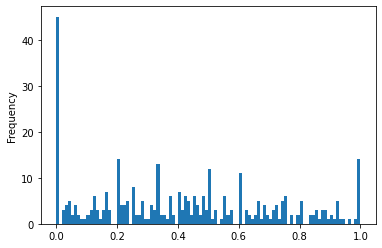

In [42]:
domain_formated.domain_value.plot(kind='hist', bins=100)

In [43]:
domainvalues = domain_formated.set_index("domain").to_dict()['domain_value']
domainvalues

{'5dariyanews.com': 0.42857142857142855,
 'aajtak.in': 0.34691745036572624,
 'aappune.org': 0.0,
 'abplive.com': 0.44749403341288785,
 'abpnadu.com': 0.6,
 'agniban.com': 0.0,
 'agrowon.com': 0.2,
 'ahmedabadmirror.com': 0.3333333333333333,
 'akilanews.com': 0.8,
 'altnews.in': 0.03496503496503497,
 'amarujala.com': 0.43042071197411,
 'anandabazar.com': 0.42857142857142855,
 'andhrajyothy.com': 0.4375,
 'anewsoffice.com': 0.0,
 'aninews.in': 0.6888888888888889,
 'argusnews.in': 1.0,
 'arunchol.com': 0.0,
 'asianetnews.com': 0.7189189189189189,
 'asomiyapratidin.in': 0.3333333333333333,
 'avatarnews.in': 1.0,
 'banglahunt.com': 1.0,
 'barandbench.com': 0.4025974025974026,
 'beforeprint.in': 0.75,
 'bhaskar.com': 0.2894736842105263,
 'bhaskarhindi.com': 0.5294117647058824,
 'bhaskarlive.in': 1.0,
 'bihardootnews.com': 0.0,
 'biharjharkhandnewsnetwork.com': 0.2,
 'business-standard.com': 0.724007561436673,
 'businessinsider.in': 0.5,
 'businesstoday.in': 0.7443946188340808,
 'businessworl

In [44]:
newsdata = data.loc[data['domain'].isin(newslist)]
domain_list = newsdata.groupby("author")['domain'].apply(list).reset_index()
domain_list.head()

,author,domain
0,01Bidar,"[indiatoday.in, prajavani.net, thehindu.com]"
1,02,"[abplive.com, indiatoday.in]"
2,0403,"[abplive.com, amarujala.com, indiatimes.com, n..."
3,07Sharma4u,[abplive.com]
4,0914,"[abplive.com, abpnadu.com, business-standard.c..."


In [45]:
domain_list['domainsize'] = domain_list['domain'].apply(lambda x: len(set(x)))
print(len(domain_list))
print(len(domain_list.loc[domain_list['domainsize']>2]))

3992
2762


In [46]:
multiple_shared_authors = domain_list.loc[domain_list['domainsize']>2]
multiple_shared_authors.head()

,author,domain,domainsize
0,01Bidar,"[indiatoday.in, prajavani.net, thehindu.com]",3
2,0403,"[abplive.com, amarujala.com, indiatimes.com, n...",5
4,0914,"[abplive.com, abpnadu.com, business-standard.c...",23
5,1,"[bhaskar.com, bhaskarhindi.com, patrika.com]",3
6,100,"[aajtak.in, abplive.com, altnews.in, amarujala...",29


In [47]:
nodes = defaultdict()
edges = defaultdict()

for idx, row in multiple_shared_authors.iterrows():
    authorlist = list(set(row['domain']))
    for a in authorlist:
        if a not in nodes:
            nodes[a] = 1
        else:
            nodes[a]+=1
            
    for i in range(len(authorlist)-1):
        for j in range(i+1, len(authorlist)):
            edgetuple = sorted([authorlist[i], authorlist[j]])
            if (edgetuple[0], edgetuple[1]) not in edges:
                edges[(edgetuple[0], edgetuple[1])] = 1
            else:
                edges[(edgetuple[0], edgetuple[1])] +=1


In [48]:
import networkx as nx

G = nx.Graph()

# for n in nodes.keys():
#     G.add_node(n, size=nodes[n], value=domainvalues[n])

ndlist = []
    
for e in edges:
    if edges[e] > 2:
        if e[0] not in ndlist:
            try:
                G.add_node(e[0], size=nodes[e[0]], party=domainvalues[e[0]])
            except:
                G.add_node(e[0], size=nodes[e[0]], party="unknown")
            ndlist.append(e[0])
        if e[1] not in ndlist:
            try:
                G.add_node(e[1], size=nodes[e[1]], party=domainvalues[e[1]])
            except:
                G.add_node(e[1], size=nodes[e[1]], party='unknown')
            ndlist.append(e[1])

        
        G.add_edge(e[0], e[1], weight=edges[e])

In [49]:
nx.write_gexf(G, "./Jan19_domainsims.gexf", encoding='utf-8')

In [46]:
edges

defaultdict(None,
            {('drivespark.com', 'shrts.in'): 1,
             ('prajavani.net', 'shrts.in'): 4,
             ('shrts.in', 'thehindu.com'): 54,
             ('indiatoday.in', 'shrts.in'): 43,
             ('livehindustan.com', 'shrts.in'): 32,
             ('drivespark.com', 'prajavani.net'): 2,
             ('drivespark.com', 'thehindu.com'): 3,
             ('drivespark.com', 'indiatoday.in'): 2,
             ('drivespark.com', 'livehindustan.com'): 1,
             ('prajavani.net', 'thehindu.com'): 21,
             ('indiatoday.in', 'prajavani.net'): 15,
             ('livehindustan.com', 'prajavani.net'): 2,
             ('indiatoday.in', 'thehindu.com'): 446,
             ('livehindustan.com', 'thehindu.com'): 241,
             ('indiatoday.in', 'livehindustan.com'): 213,
             ('expert.so', 'time8.in'): 2,
             ('abplive.com', 'time8.in'): 8,
             ('indiatoday.in', 'time8.in'): 8,
             ('forms.gle', 'time8.in'): 5,
             ('tez

In [47]:
G.nodes

NodeView(('shrts.in', 'thehindu.com', 'indiatoday.in', 'livehindustan.com', 'prajavani.net', 'abplive.com', 'time8.in', 'forms.gle', 'amarujala.com', 'hindustantimes.com', 'linkedin.com', 'amitshah.co.in', 'nm-4.com', 'bitly.ws', 'pscp.tv', 'mygov.in', 'padmaawards.gov.in', 'news18.com', 'indiatimes.com', 'bjp.org', 'bjplive.org', 'narendramodi.in', 'pib.gov.in', 'washingtonpost.com', 'cybercrime.gov.in', 'cowin.gov.in', 'sonarbangla2021.com', 'indianrail.gov.in', 'india.com', 'tv9hindi.com', 'dinamalar.com', 'sundayguardianlive.com', 'nytimes.com', 'business-standard.com', 'reuters.com', 'hindupost.in', 'cutt.ly', 'foreignpolicy.com', 'wikipedia.org', 'ecoti.in', 'livelaw.in', 'livemint.com', 'firstpost.com', 'mathrubhumi.com', 'timesnownews.com', 'wionews.com', 'tfipost.com', 'outlookindia.com', 'chng.it', 'timesofindia.com', 'fllwrs.com', 'thecommunemag.com', 'wp.me', 'tinyurl.com', 'ndtv.com', 'opindia.com', 'rt.com', 'maalaimalar.com', 'indianarrative.com', 'nakkheeran.in', 'india

In [48]:
import requests
from bs4 import BeautifulSoup

In [59]:
# target url
url = 'https://washingtonpost.com'
  
# making requests instance
reqs = requests.get(url)
  
# using the BeaitifulSoup module
soup = BeautifulSoup(reqs.text, 'html.parser')
  
# displaying the title
print("Title of the website is : ")
for title in soup.find_all('title'):
    print(title.get_text())

Title of the website is : 
The Washington Post: Breaking News, World, US, DC News and Analysis
Search
Menu
Menu
ProfileSolid
ProfileSolid
Logo of The Washington Post
ChevronRight
ChevronRight
ListenSolid
Loading...
ChevronRight
Loading...
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
ChevronRight
Loading...
ChevronRight
Loading...
ChevronRight
CommentSolid
Crossword
Mahjongg
Sudoku
Wordwipe
Horoscopes
Solitaire
Tvlistings


In [54]:
nodelist = list(G.nodes)

In [55]:
len(nodelist)

721

In [ ]:
def is_news(text):
    if "news" in text.lower():
        return 1
    
dom